In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.callbacks import EarlyStopping
import keras.backend as K

In [3]:
base_dir = r'C:\Users\firoj\OneDrive\Desktop\thesis_test\Thesis_test_01\Feature_matrix\AIS\\'
os.chdir(base_dir)

In [4]:
# Load the datasets
X_train = np.load(base_dir + 'X_train.npy')
X_val = np.load(base_dir + 'X_val.npy')
X_test = np.load(base_dir + 'X_test.npy')

y_train = np.load(base_dir + 'y_train.npy')
y_val = np.load(base_dir + 'y_val.npy')
y_test = np.load(base_dir + 'y_test.npy')

In [5]:
# Reshape X_train to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("New shape of X_train:", X_train.shape)

New shape of X_train: (34654, 1, 6)


In [6]:
# Define RMSE as a custom metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [7]:
input_shape = (X_train.shape[1], X_train.shape[2]) # timesteps, features

In [8]:
# Model architecture with L1 Regularization using GRU
model = Sequential([
    GRU(50, return_sequences=True, input_shape=input_shape, kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    GRU(50, kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    Dense(1)
])

In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.006793806619350815), 
              loss='mean_squared_error', 
              metrics=['mse', rmse, 'mae', 'mape'])

In [10]:
# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 50)             8700      
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 gru_1 (GRU)                 (None, 50)                15300     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 24051 (93.95 KB)
Trainable params: 24051 (93.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/100
1083/1083 [==============================] - 7s 4ms/step - loss: 228647.8438 - mse: 228627.1250 - rmse: 466.7430 - mae: 271.5549 - mape: 2686282752.0000 - val_loss: 168379.2031 - val_mse: 168348.7656 - val_rmse: 399.9346 - val_mae: 231.1165 - val_mape: 2799793408.0000
Epoch 2/100
1083/1083 [==============================] - 3s 3ms/step - loss: 142634.1562 - mse: 142596.6719 - rmse: 368.2660 - mae: 216.0560 - mape: 2583666688.0000 - val_loss: 118876.0547 - val_mse: 118833.3281 - val_rmse: 336.7052 - val_mae: 206.3195 - val_mape: 2897739008.0000
Epoch 3/100
1083/1083 [==============================] - 3s 3ms/step - loss: 113415.4219 - mse: 113368.5234 - rmse: 329.2907 - mae: 200.9475 - mape: 2330189312.0000 - val_loss: 102661.5938 - val_mse: 102611.2188 - val_rmse: 313.2948 - val_mae: 192.6739 - val_mape: 2238144256.0000
Epoch 4/100
1083/1083 [==============================] - 4s 3ms/step - loss: 103696.3984 - mse: 103643.3516 - rmse: 316.0504 - mae: 194.8860 - mape: 22373754

1083/1083 [==============================] - 3s 3ms/step - loss: 83339.3281 - mse: 83237.2578 - rmse: 282.0506 - mae: 172.9669 - mape: 1981106944.0000 - val_loss: 76722.1484 - val_mse: 76619.3906 - val_rmse: 269.6460 - val_mae: 164.1513 - val_mape: 2072118144.0000
Epoch 31/100
1083/1083 [==============================] - 3s 3ms/step - loss: 82287.6719 - mse: 82184.2891 - rmse: 280.7995 - mae: 171.7623 - mape: 1942033024.0000 - val_loss: 75256.3984 - val_mse: 75152.3047 - val_rmse: 267.1517 - val_mae: 163.0242 - val_mape: 1875770880.0000
Epoch 32/100
1083/1083 [==============================] - 3s 3ms/step - loss: 82849.7578 - mse: 82745.0859 - rmse: 281.2587 - mae: 171.9404 - mape: 1942854144.0000 - val_loss: 76301.4297 - val_mse: 76196.2734 - val_rmse: 268.7989 - val_mae: 163.3789 - val_mape: 1917563264.0000
Epoch 33/100
1083/1083 [==============================] - 3s 3ms/step - loss: 82905.0156 - mse: 82799.3047 - rmse: 281.7434 - mae: 171.7710 - mape: 1894165504.0000 - val_loss: 755

In [13]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

233/233 [==============================] - 0s 1ms/step - loss: 73303.9141 - mse: 73186.9453 - rmse: 264.1584 - mae: 158.4227 - mape: 1913045248.0000
Test Loss: [73303.9140625, 73186.9453125, 264.15838623046875, 158.4226837158203, 1913045248.0]


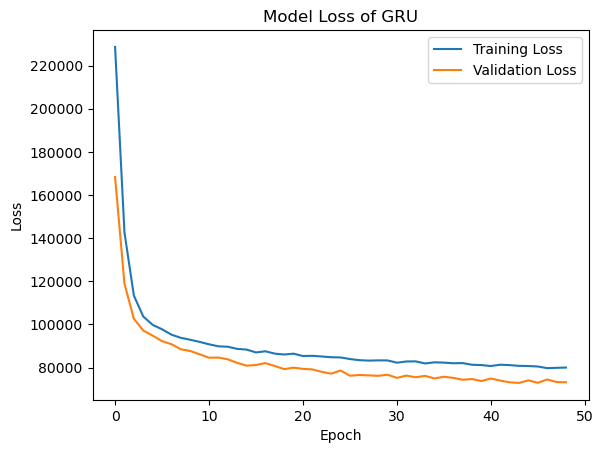

In [14]:
# Assuming history is the output of the model.fit() method
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss of GRU')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
y_pred = model.predict(X_test).flatten()  # Flatten predictions to ensure it's a 1D array
y_test_flattened = y_test.flatten()  # Flatten actual values for consistency

233/233 [==============================] - 1s 881us/step


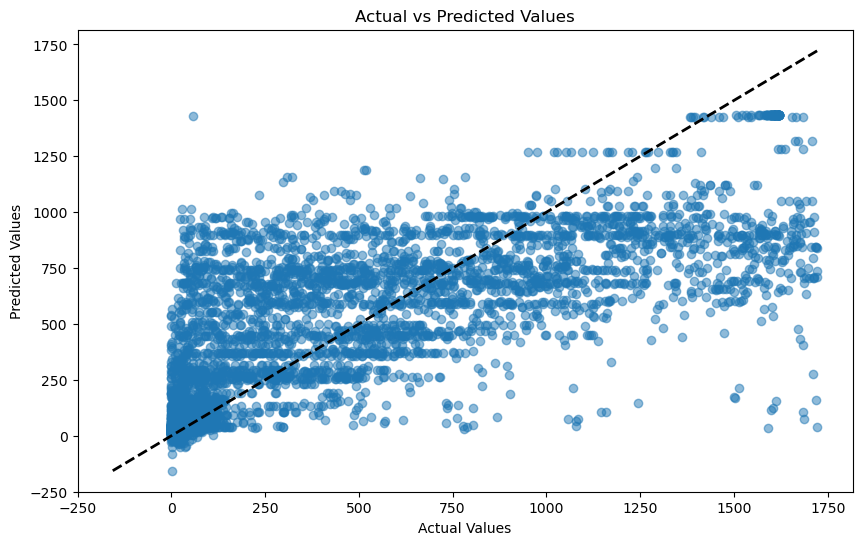

In [16]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flattened, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot a line of perfect predictions for reference
max_val = max(y_test_flattened.max(), y_pred.max())
min_val = min(y_test_flattened.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)  # Black dashed line for perfect predictions

plt.show()

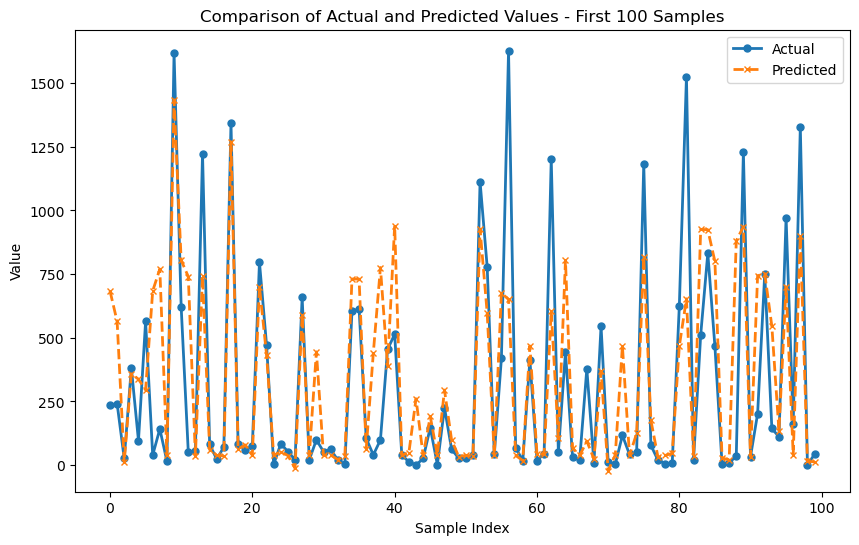

In [17]:
# Plotting a line plot for a clearer comparison for a subset
plt.figure(figsize=(10, 6))
plt.plot(y_test_flattened[:100], marker='o', label='Actual', linewidth=2, markersize=5)
plt.plot(y_pred[:100], marker='x', linestyle='--', label='Predicted', linewidth=2, markersize=5)
plt.title('Comparison of Actual and Predicted Values - First 100 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

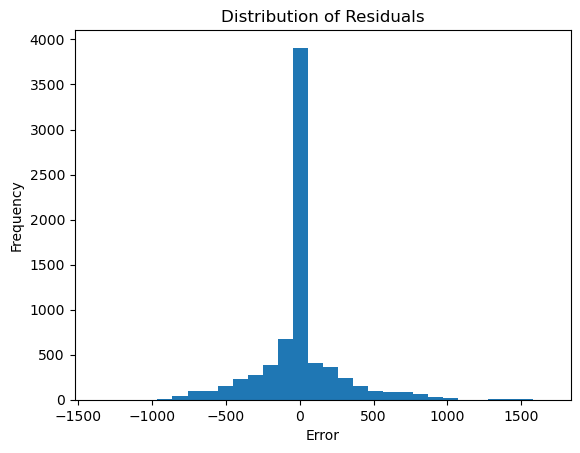

In [18]:
# Calculating residuals
residuals = y_test - y_pred.squeeze()  # Adjust dimensions if necessary

# Plotting the histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [19]:
# Evaluate the model
loss, mse, rmse, mae, mape = model.evaluate(X_test, y_test)
print("Test loss (MSE):", loss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

233/233 [==============================] - 0s 1ms/step - loss: 73303.9141 - mse: 73186.9453 - rmse: 264.1584 - mae: 158.4227 - mape: 1913045248.0000
Test loss (MSE): 73303.9140625
Mean Squared Error (MSE): 73186.9453125
Root Mean Squared Error (RMSE): 264.15838623046875
Mean Absolute Error (MAE): 158.4226837158203
Mean Absolute Percentage Error (MAPE): 1913045248.0
